In [1]:
from enum import Enum
from sympy.ntheory import isprime
import matplotlib.pyplot as plt

In [2]:
class Direction(Enum):
    EAST = (1, 0)
    SOUTH = (0, -1)
    WEST = (-1, 0)
    NORTH = (0, 1)
    
def rotate(direction):
    if direction == Direction.EAST: return Direction.NORTH
    if direction == Direction.SOUTH: return Direction.EAST
    if direction == Direction.WEST: return Direction.SOUTH
    if direction == Direction.NORTH: return Direction.WEST

def draw(count, boundary=True):
    def mark_prime(coordinate):
        plt.plot(coordinate[0], coordinate[1], marker='o', markersize=4, color="red")

    def get_next_point(coordinate, direction):
        x, y = coordinate
        x_increment, y_increment = direction.value
        return (x + x_increment, y + y_increment)
        
    # Initialization
    direction = Direction.SOUTH 
    step = 1
    x_coordinates = [0]
    y_coordinates = [0]
    coordinates = [(0,0)]
    
    # Adjust dimension 
    plt.axes([0, 0, 2, 2])

    for i in range(count):
        current_coordinate = (x_coordinates[-1], y_coordinates[-1])
        
        # Mark as red point if current number is prime
        if isprime(step): mark_prime(current_coordinate)

        # Rotate to get next point
        next_point = get_next_point(current_coordinate, rotate(direction))

        # If the point is already taken, means visited earlier, revert back to no rotation
        # Else the next point is the correct one, just update the direction
        if(next_point in coordinates):
            next_point = get_next_point(current_coordinate, direction)
        else: 
            direction = rotate(direction)
            
        # Update coordinates
        x_coordinates.append(next_point[0])
        y_coordinates.append(next_point[1])
        coordinates.append((x_coordinates[-1], y_coordinates[-1]))

        step = step + 1

    plt.axis('equal')
    plt.axis('off')
    if boundary: 
        plt.plot(x_coordinates, y_coordinates)
    plt.show()

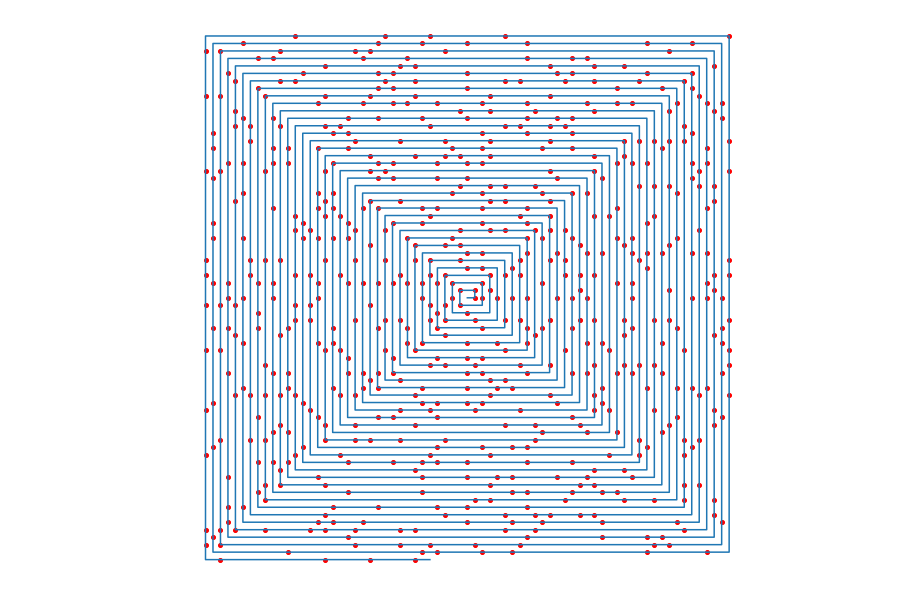

In [3]:
# Plot 5,000 numbers in spiral shape
# Start from center with value 1, following anti-clockwise direction
# Prime numbers will be marked as red
draw(5000)

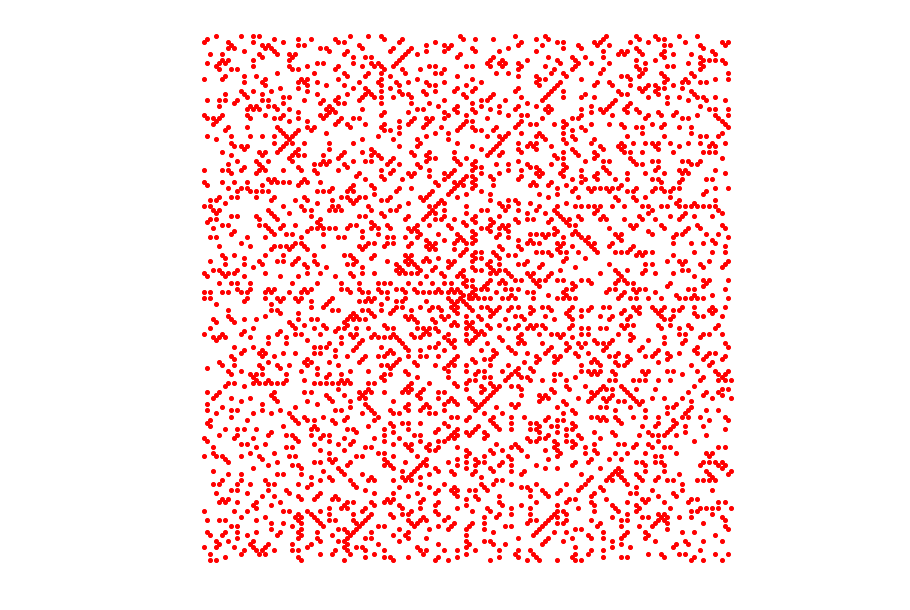

In [4]:
# Plot 30,000 numbers in spiral shape without boundary
draw(30000, boundary=False)